# Exploratory Data Analysis

**Project:** Income Predictors

**Team:** Team 1 C4: Masha Bystritskii & Sara Mahmoud

**Date:** February 19th, 2026


**Project Overview:**
The variable we are trying to predict is income (greater or less than 50K). This problem is important because, using the predictors in the dataset, we can see if specific variables will have more or less effect on income. This project is classification. 

**Source:**
https://archive.ics.uci.edu/ml/datasets/Adult

**Size:**
32561 rows, 15 columns


## Table of Contents
1. Setup & Load Data
2. Data Quality Check
3. Target Variable Analysis
4. Feature Distributions
5. Correlation Analysis
6. Key Findings Summary



## 1. Setup & Load Data

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print("✓ Libraries loaded!")

✓ Libraries loaded!


In [14]:
# Load raw data
# TODO: Update the file path to your dataset
# Define column names
columns = [
    "age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex",
    "capital_gain","capital_loss","hours_per_week","native_country","income"
]

# Load raw data
df = pd.read_csv('adult.data', names=columns, skipinitialspace=True)

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



## 2. Data Quality Check

**Questions to answer:**
- What are the data types?
- Are there missing values?
- Are there duplicate rows?

In [15]:
df.shape

(32561, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(24)

In [19]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Data Quality Observations

*TODO: Write your observations here*

1. **Data types:** The dataset contains 32,561 rows and 15 columns. There are 6 numeric variables (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) and 9 categorical variables, workclass, education, marital_status, occupation, race, sex, native_country, income).

2. **Missing values:**missing NaN values were detected using df.isnull(). Howe an issue I found is thatver, this dataset represents missing values as "?" in certain categorical columns, which will need to be handled during preprocessing.

3. **Duplicates:** There are 24 duplicate rows in the dataset.

4. **Potential issues:** 
   - capital_gain has a maximum value of 99,999 and capital_loss has a maximum of 4,356, indicating extreme outliers.
   - hours_per_week ranges from 1 to 99 hours, which may contain unrealistic values.
   - Categorical variables will require encoding before modeling.



## 3. Target Variable Analysis

**Your target variable:** [TODO: What are you trying to predict?]

<Axes: xlabel='income'>

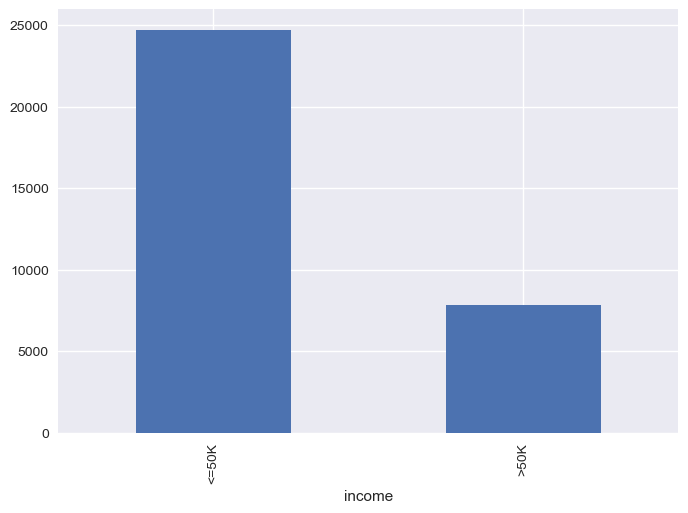

In [20]:
df['income'].value_counts()
df['income'].value_counts().plot(kind='bar')

### Target Variable Observations

*TODO: Write your observations here*

1. **Distribution shape:** The target variable contains two categoesri beings: <=50K and >50K.

2. **Class counts:** There are 24,720 individuals earning <=50K and 7,841 individuals earning >50K.

3. **Class balance:** The dataset is imbalanced, with approximately 76% of individuals earning <=50K and 24% earning >50K.

4. **Potential issues:** Class imbalance may bias a model toward predicting the majority class (<=50K), so evaluation metrics beyond  ( (e.g., precision, recall) will be important in later stages.



## 4. Feature Distributions

In [21]:
df['income'].nunique() # number of unique values
df['income'].value_counts() # counts per category

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

### Feature Distribution Observations

There are significantly more people who make less than or equal to 50k, 24720, while there are only 7841 people who make more than 50k. 


## 5. Correlation Analysis

In [22]:
## not applicable for classification

### Correlation Observations

*TODO: Write your observations here*

1. **Strongest predictor:** ...
2. **Other important features:** ...
3. **Multicollinearity concerns:** ...


## 6. Key Findings Summary

1. Dataset: 32,561 rows, 15 columns, no missing values
2. Target: 24,720 individuals earning <=50K and 7,841 individuals earning >50K
3. There are 6 numeric variables (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) and 9 categorical variables, workclass, education, marital_status, occupation, race, sex, native_country, income)
4. The average age of people surveyed was 38.58 and they worked an average of 40.44 hours a week. 

## EDA Checklist

Before moving to modeling, ensure you've completed:

- [ ] Loaded and examined the data
- [ ] Checked data types
- [ ] Identified and documented missing values
- [ ] Analyzed target variable distribution
- [ ] Examined feature distributions
- [ ] Created correlation analysis
- [ ] Documented key findings
- [ ] Identified potential data quality issues